# LIMPIEZA Y PREPROCESAMIENTO DE DATOS



Librerías a emplear:

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure
import seaborn as sns 
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)



#### Lectura de los datos y primer análisis
Leemos los datos del csv estando este en el mismo directorio que el código. 

In [3]:
df=pd.read_csv('9898-19430301-20221204.csv',sep=';')
df_original=pd.read_csv('9898-19430301-20221204.csv',sep=';')


Vamos a analizar el data frame que tenemos.


In [4]:
df.head(5)


,FECHA,INDICATIVO,NOMBRE,PROVINCIA,ALTITUD,TMEDIA,PRECIPITACION,TMIN,HORATMIN,TMAX,HORATMAX,DIR,VELMEDIA,RACHA,HORARACHA,SOL,PRESMAX,HORAPRESMAX,PRESMIN,HORAPRESMIN
0,1943-03-01,9898,HUESCA AEROPUERTO,HUESCA,546,9.8,NaN,5.0,NaN,14.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1943-03-02,9898,HUESCA AEROPUERTO,HUESCA,546,11.1,NaN,5.2,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1943-03-03,9898,HUESCA AEROPUERTO,HUESCA,546,11.9,NaN,5.6,NaN,18.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1943-03-04,9898,HUESCA AEROPUERTO,HUESCA,546,11.0,NaN,7.9,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1943-03-05,9898,HUESCA AEROPUERTO,HUESCA,546,8.5,NaN,5.4,NaN,11.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail(2)

,FECHA,INDICATIVO,NOMBRE,PROVINCIA,ALTITUD,TMEDIA,PRECIPITACION,TMIN,HORATMIN,TMAX,HORATMAX,DIR,VELMEDIA,RACHA,HORARACHA,SOL,PRESMAX,HORAPRESMAX,PRESMIN,HORAPRESMIN
28614,2022-12-03,9898,"HUESCA, AEROPUERTO",HUESCA,546,1.4,0.0,-0.3,00:00,3.0,Varias,12.0,1.4,5.6,12:10,0.0,946.5,00,942.4,15
28615,2022-12-04,9898,"HUESCA, AEROPUERTO",HUESCA,546,3.8,0.0,0.7,06:40,6.9,13:00,99.0,1.1,5.0,Varias,5.0,951.1,24,943.8,01


In [6]:
print(df.shape)


(28616, 20)


In [7]:
print(df.dtypes)

FECHA             object
INDICATIVO         int64
NOMBRE            object
PROVINCIA         object
ALTITUD            int64
TMEDIA           float64
PRECIPITACION     object
TMIN             float64
HORATMIN          object
TMAX             float64
HORATMAX          object
DIR              float64
VELMEDIA         float64
RACHA            float64
HORARACHA         object
SOL              float64
PRESMAX          float64
HORAPRESMAX       object
PRESMIN          float64
HORAPRESMIN       object
dtype: object


Vemos como aquellos campos que aceptan 'varios' se han cargado como tipo objeto. Lo primero que vamos a hacer es localizar esos valores y modificarlos.
En primer lugar vamos a arreglar la columna de precipitaciones. Sabemos que cuando estas son muy leves se les da el valor de 'Ip' lo cual es un problema. Vamos a modificar esos valores a 0 y vamos a cambiar el tipo a float.

In [8]:
'Ip' in df['PRECIPITACION'].values
for index,dato in enumerate(df['PRECIPITACION']):
  if dato == 'Ip':
    df['PRECIPITACION'].iloc[index]=0.1

C:\Users\miomo\AppData\Local\Temp\ipykernel_15920\269649687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PRECIPITACION'].iloc[index]=0.1


In [9]:
df['PRECIPITACION']=df['PRECIPITACION'].astype('float')

Se va a modificar el resto de atributos, en este momento vamos a transformar los vampos que sean 'Varias' a NaN y más adelante gestionaremos estos campos junto a los demás datos faltantes. 

In [10]:
df['PRECIPITACION'].keys

<bound method Series.keys of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
28611    0.0
28612    0.0
28613    0.0
28614    0.0
28615    0.0
Name: PRECIPITACION, Length: 28616, dtype: float64>

In [11]:

for column in df.columns[7 : ]:
  for index,dato in df[column].items():
    if dato == 'Varias':
      #print("Se ha remplazado el valor numero {} del atributo {} con el valor de {} por NaN ".format(index,column,df[column].loc[index]))
      df.loc[index,column]=np.NaN
      

In [12]:
df.tail(3)

,FECHA,INDICATIVO,NOMBRE,PROVINCIA,ALTITUD,TMEDIA,PRECIPITACION,TMIN,HORATMIN,TMAX,HORATMAX,DIR,VELMEDIA,RACHA,HORARACHA,SOL,PRESMAX,HORAPRESMAX,PRESMIN,HORAPRESMIN
28613,2022-12-02,9898,"HUESCA, AEROPUERTO",HUESCA,546,3.0,0.0,-0.3,23:50,6.4,12:00,12.0,1.1,3.6,07:40,1.6,952.3,00,946.5,24
28614,2022-12-03,9898,"HUESCA, AEROPUERTO",HUESCA,546,1.4,0.0,-0.3,00:00,3.0,NaN,12.0,1.4,5.6,12:10,0.0,946.5,00,942.4,15
28615,2022-12-04,9898,"HUESCA, AEROPUERTO",HUESCA,546,3.8,0.0,0.7,06:40,6.9,13:00,99.0,1.1,5.0,NaN,5.0,951.1,24,943.8,01


## Analisis de valores nulos

<AxesSubplot:>

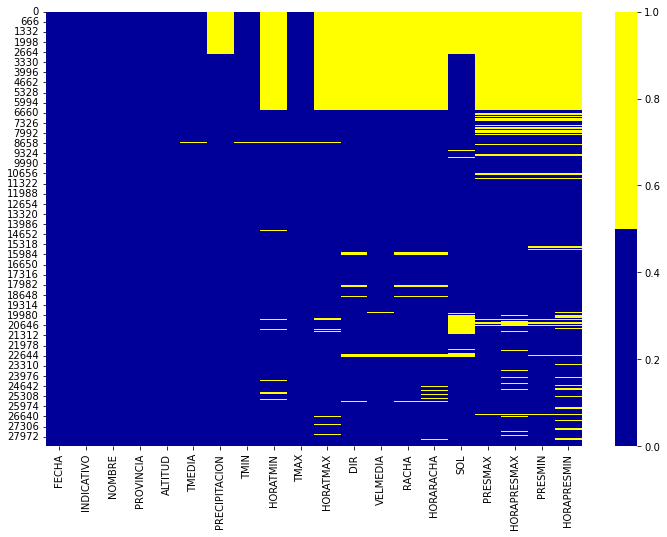

In [13]:
cols = df.columns # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
ylabels=df['FECHA'].values
ylabels=' '.join(ylabels)
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [14]:
df.iloc[6500]

FECHA                   1961-02-14
INDICATIVO                    9898
NOMBRE           HUESCA AEROPUERTO
PROVINCIA                   HUESCA
ALTITUD                        546
TMEDIA                         9.0
PRECIPITACION                  0.0
TMIN                           4.0
HORATMIN                     07:20
TMAX                          14.0
HORATMAX                     15:15
DIR                            9.0
VELMEDIA                       2.2
RACHA                          6.1
HORARACHA                    15:00
SOL                            9.0
PRESMAX                      963.2
HORAPRESMAX                     24
PRESMIN                      959.1
HORAPRESMIN                     05
Name: 6500, dtype: object

In [15]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

FECHA - 0%
INDICATIVO - 0%
NOMBRE - 0%
PROVINCIA - 0%
ALTITUD - 0%
TMEDIA - 0%
PRECIPITACION - 10%
TMIN - 0%
HORATMIN - 24%
TMAX - 0%
HORATMAX - 24%
DIR - 27%
VELMEDIA - 23%
RACHA - 27%
HORARACHA - 28%
SOL - 17%
PRESMAX - 27%
HORAPRESMAX - 30%
PRESMIN - 27%
HORAPRESMIN - 32%


Vamos a seleccionar un subset donde tengamos todas las variables, aunque pueda haber valores Nan. En primer lugar vamos a eliminar los registros correspondientes al año 2006 ya que la estación metereológica presenta algún problema y las medidas de sol y presión no son buenas (varios meses sin registrar). Para hacer esto puede ser interesante obtener los campos día, mes, año y las fechas anuales en formato datetime.  
   

### Fechas y horas
Vamos a canviar el tipo de dato de FECHA de "objetc" a "datetime", además vamos a añadir dia, mes, año, dia de la semana y semana del año como nuevas columnas del data frame. 

In [16]:
df['FECHA_dt']=pd.to_datetime(df['FECHA'],format="%Y-%m-%d",exact=True)


In [17]:
df['YEAR'] = df['FECHA_dt'].dt.year
df['MONTH'] = df['FECHA_dt'].dt.month
df['DAY'] = df['FECHA_dt'].dt.day
df['WEEK']=df['FECHA_dt'].dt.isocalendar()['week']


  (Estas celdas se ejecutarán más adelante ya que se van a aplicar estrategías para completar datos nulos y las tendríamos que volver a ejecutar. Se incluye aquí como referencia)
  Queremos ahora ajustar las horas de presión mínima para que sean del tipo Data Time, no obstante tenemos varios problemas. El primero es que el formato de fecha no es correcto, se tiene valor de 24 en vez de 00:00. Después el formato en si.


In [18]:
'''
for index,horas in df['HORAPRESMIN'].items():
  if str(horas) != 'nan':
    if int(horas)==24:
      df['HORAPRESMIN'].iloc[index]= '00:00'
    else:
      df['HORAPRESMIN'].iloc[index]= horas+':00'
'''

"\nfor index,horas in df['HORAPRESMIN'].items():\n  if str(horas) != 'nan':\n    if int(horas)==24:\n      df['HORAPRESMIN'].iloc[index]= '00:00'\n    else:\n      df['HORAPRESMIN'].iloc[index]= horas+':00'\n"

In [19]:
'''
for index,horas in df['HORAPRESMAX'].items():
  if str(horas) != 'nan':
    if int(horas)==24:
      df['HORAPRESMAX'].iloc[index]= '00:00'
    else:
      df['HORAPRESMAX'].iloc[index]= horas+':00'
'''      

"\nfor index,horas in df['HORAPRESMAX'].items():\n  if str(horas) != 'nan':\n    if int(horas)==24:\n      df['HORAPRESMAX'].iloc[index]= '00:00'\n    else:\n      df['HORAPRESMAX'].iloc[index]= horas+':00'\n"

In [20]:
'''df['HORAPRESMIN_2']=pd.to_datetime(df['FECHA']+' '+df['HORAPRESMIN']+':00',infer_datetime_format=True)
df['HORAPRESMIN_2']
'''


"df['HORAPRESMIN_2']=pd.to_datetime(df['FECHA']+' '+df['HORAPRESMIN']+':00',infer_datetime_format=True)\ndf['HORAPRESMIN_2']\n"

In [21]:
'''df['HORAPRESMAX_2']=pd.to_datetime(df['FECHA']+' '+df['HORAPRESMIN']+':00',infer_datetime_format=True)'''

"df['HORAPRESMAX_2']=pd.to_datetime(df['FECHA']+' '+df['HORAPRESMIN']+':00',infer_datetime_format=True)"

Haremos lo equivalente con los campos HORATMIN y HORATMAX, el campo HORARACHA se eliminará más adelante ya que saber a qué hora del día se produce la máxima racha de viento sin datos de menor frecuencia no aporta valor dado el carácter aleatorio del viento.


In [22]:
'''df['HORATMIN_2']=pd.to_datetime(df['FECHA']+' '+df['HORATMIN']+':00',infer_datetime_format=True)
df['HORATMAX_2']=pd.to_datetime(df['FECHA']+' '+df['HORATMAX']+':00',infer_datetime_format=True)'''



"df['HORATMIN_2']=pd.to_datetime(df['FECHA']+' '+df['HORATMIN']+':00',infer_datetime_format=True)\ndf['HORATMAX_2']=pd.to_datetime(df['FECHA']+' '+df['HORATMAX']+':00',infer_datetime_format=True)"

### Elección de un sub set de datos 

In [23]:
missingByYear={}
missingInYear={}
dfmv=pd.DataFrame(index=[df['YEAR'].unique()],columns=['FECHA', 'INDICATIVO', 'NOMBRE', 'PROVINCIA', 'ALTITUD', 'TMEDIA','PRECIPITACION', 'TMIN', 'HORATMIN', 'TMAX', 'HORATMAX', 'DIR','VELMEDIA', 'RACHA', 'HORARACHA', 'SOL', 'PRESMAX', 'HORAPRESMAX','PRESMIN', 'HORAPRESMIN', 'FECHA_dt', 'YEAR', 'MONTH', 'DAY', 'WEEK'])


In [24]:

for year in df['YEAR'].unique():
  dfs=df[df['YEAR'] == year]
  missingByYear[year]=np.mean(dfs.isnull())
  for col in dfs.columns:
    pct_missing = np.mean(dfs[col].isnull())
    dfmv.at[year,col]=pct_missing
   
dfmv.to_csv('miss')



c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [25]:
df2=df.copy(deep=True)
df_1961=df[df['YEAR']>=1961]

In [26]:
df_1961=df_1961[df_1961['YEAR']!=2006]

In [27]:
df_1961['YEAR'].unique()


array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [28]:
df=df_1961.copy(deep=True)


In [29]:
dfaux=df.set_index('FECHA_dt',drop=False)

<AxesSubplot:ylabel='FECHA_dt'>

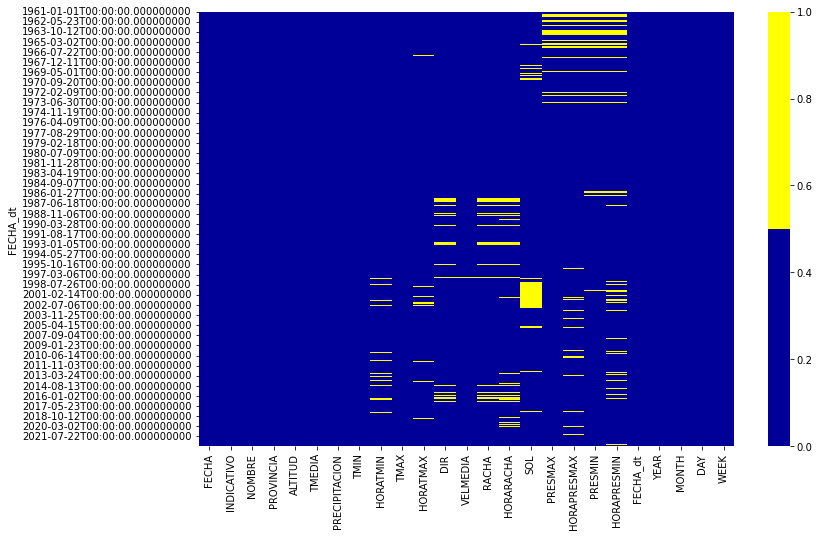

In [30]:
cols = dfaux.columns # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dfaux[cols].isnull(), cmap=sns.color_palette(colours))

Vemos cómo prescindir de estos campos mejora los datos, pero sigue habiendo una gran cantidad de NaN values. Estos aparecen en los campos correspondientes a las horas, sol, racha, y presiones máximas y mínimas.
### Valores NaN
Ahora vamos a ver qué política se emplea para todos estos valores faltantes.  
Dado que estamos en un problema donde la estacionalidad de los datos es muy marcada, para los campos de "HORAS" se va a emplear la hora que sea la moda estadística de los años anteriores ese mismo día. (En la entrega 1 se propone usar el valor anterior, pero esto creo que da mejores resultados y como no es una solución más sencilla que la planteada optó por esta.)
Para los campos de presión, el campo de horas de sol y velocidad media se va a emplear la media de los valores de los años anteriores en el mismo día del mismo mes, para mantener la estacionalidad.
 
Los datos correspondientes a Dir y Racha se van a eliminar. Esto se debe a que en Aragón, zona geográfica donde se registran estos datos, se produce un fenómeno meteorológico denominado Cierzo. El cierzo es un tipo de viento racheado y de dirección cambiante. Por lo que tener únicamente los valores máximos y la dirección de estas rachas no aporta una información relevante relativa a la temperatura, o no por lo menos sin contar con datos de mayor frecuencia. La velocidad media se va a mantener.


In [31]:
df.head()

,FECHA,INDICATIVO,NOMBRE,PROVINCIA,ALTITUD,TMEDIA,PRECIPITACION,TMIN,HORATMIN,TMAX,...,SOL,PRESMAX,HORAPRESMAX,PRESMIN,HORAPRESMIN,FECHA_dt,YEAR,MONTH,DAY,WEEK
6456,1961-01-01,9898,HUESCA AEROPUERTO,HUESCA,546,6.4,0.0,3.4,05:50,9.4,...,4.9,954.0,23,946.6,05,1961-01-01,1961,1,1,52
6457,1961-01-02,9898,HUESCA AEROPUERTO,HUESCA,546,5.5,5.6,1.6,00:20,9.4,...,4.2,955.6,11,947.2,24,1961-01-02,1961,1,2,1
6458,1961-01-03,9898,HUESCA AEROPUERTO,HUESCA,546,6.9,4.0,4.4,05:00,9.4,...,2.4,947.1,00,937.0,14,1961-01-03,1961,1,3,1
6459,1961-01-04,9898,HUESCA AEROPUERTO,HUESCA,546,4.2,0.0,1.6,03:40,6.8,...,3.7,948.4,22,939.9,00,1961-01-04,1961,1,4,1
6460,1961-01-05,9898,HUESCA AEROPUERTO,HUESCA,546,4.1,0.0,0.2,05:10,8.0,...,8.2,957.9,23,948.3,00,1961-01-05,1961,1,5,1


In [32]:
#df[df.MONTH.isin([1]) & df.DAY.isin([1])]


In [33]:
dfNaN=df.copy(deep=True)

In [34]:
from random import randint

def calculoMedias(df:pd.DataFrame,dia:int,mes:int,col:str)->float:

  dfaux=df[df.MONTH.isin([mes]) & df.DAY.isin([dia])]

  media= dfaux[col].median(skipna=True)
  return media


In [35]:
def calculoModa(df:pd.DataFrame,dia:int,mes:int,col:str)->float:
  
  dfaux=df[df.MONTH.isin([mes]) & df.DAY.isin([dia])]
  media= dfaux[col].mode(dropna=True)[0]
  return media

In [36]:
for col in df.columns.values:
  missing = df[col].isnull()
  num_missing = np.sum(missing)
  if num_missing >0:
    dfaux=df[df[col].isnull()]
    for index,valores in dfaux[col].items():
      if col in ['SOL','VELMEDIA','PRESMAX','PRESMIN']:
        dfNaN.loc[index,col]=calculoMedias(df,df['DAY'].loc[index],df['MONTH'].loc[index],col)
        salida=calculoMedias(df,df['DAY'].loc[index],df['MONTH'].loc[index],col)
        print('insertado en el indice {}, de la columna: {}, el valor de: {}'.format(index,col,salida))
      else:
        dfNaN.loc[index,col]=calculoModa(df,df['DAY'].loc[index],df['MONTH'].loc[index],col)
        salida=calculoModa(df,df['DAY'].loc[index],df['MONTH'].loc[index],col)
        print('insertado en el indice {}, de la columna: {}, el valor de: {}'.format(index,col,salida))

insertado en el indice 7922, de la columna: TMEDIA, el valor de: 5.6
insertado en el indice 8029, de la columna: TMEDIA, el valor de: 9.9
insertado en el indice 8042, de la columna: TMEDIA, el valor de: 14.4
insertado en el indice 8189, de la columna: TMEDIA, el valor de: 14.6
insertado en el indice 8260, de la columna: TMEDIA, el valor de: 7.6
insertado en el indice 8277, de la columna: TMEDIA, el valor de: 5.1
insertado en el indice 8398, de la columna: TMEDIA, el valor de: 11.6
insertado en el indice 8453, de la columna: TMEDIA, el valor de: 23.0
insertado en el indice 8523, de la columna: TMEDIA, el valor de: 22.4
insertado en el indice 8617, de la columna: TMEDIA, el valor de: 4.6
insertado en el indice 8619, de la columna: TMEDIA, el valor de: 6.1
insertado en el indice 8622, de la columna: TMEDIA, el valor de: 4.9
insertado en el indice 8637, de la columna: TMEDIA, el valor de: 3.5
insertado en el indice 8646, de la columna: TMEDIA, el valor de: 7.2
insertado en el indice 9539, 

<AxesSubplot:>

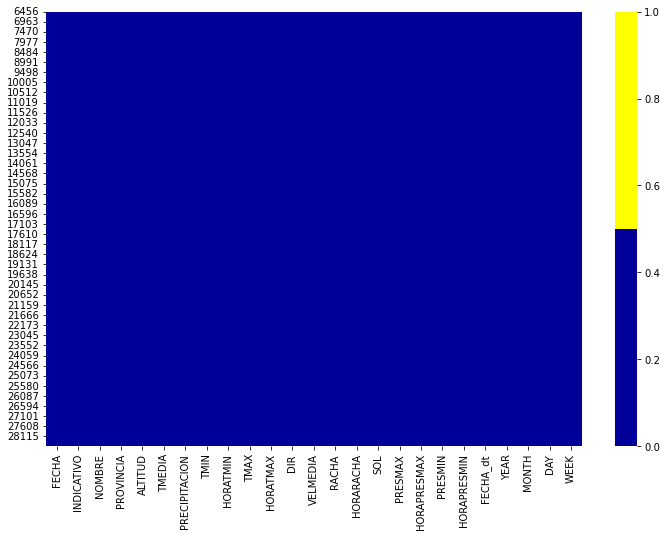

In [37]:
cols = dfNaN.columns # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dfNaN[cols].isnull(), cmap=sns.color_palette(colours),vmin=0,vmax=1)

In [38]:
df=dfNaN.copy(deep=True)

Vemos cómo se han completado todos los valores NaN. Ahora vamos a ejecutar las celdas de Fechas y Horas que no habíamos ejecutados antes y que nos añadirán los campos de las horas con formato ISO.
En primer lugar hemos de cambiar los calores de 24 por 00, además de añadir los minutos a todos los campos como ':00'



In [39]:
for index,horas in df['HORAPRESMIN'].items():
  if str(horas) != 'nan':
    if int(horas)==24:
      df.loc[index,'HORAPRESMIN']= '00:00'
    else:
      df.loc[index,'HORAPRESMIN']= horas+':00'
      


In [40]:
for index,horas in df['HORAPRESMAX'].items():
  if str(horas) != 'nan':
    if int(horas)==24:
      df.loc[index,'HORAPRESMIN']= '00:00'
    else:
      df.loc[index,'HORAPRESMIN']= horas+':00'


In [41]:
df['HORAPRESMIN_2']=pd.to_datetime(df['FECHA']+' '+df['HORAPRESMIN']+':00',infer_datetime_format=True)



df['HORAPRESMAX_2']=pd.to_datetime(df['FECHA']+' '+df['HORAPRESMIN']+':00',infer_datetime_format=True)


In [42]:
df['HORATMAX']

6456     13:25
6457     14:00
6458     15:55
6459     13:10
6460     15:50
         ...  
28611    13:10
28612    15:00
28613    12:00
28614    14:50
28615    13:00
Name: HORATMAX, Length: 21795, dtype: object

In [43]:
df2['HORATMAX'].to_csv('micsv')


Haremos lo equivalente con los campos HORATMIN y HORATMAX, el campo HORARACHA se eliminará más adelante ya que saber a qué hora del día se produce la máxima racha de viento sin datos de menor frecuencia no aporta valor dado el carácter aleatorio del viento.


In [44]:
df['HORATMIN_2']=pd.to_datetime(df['FECHA']+' '+df['HORATMIN']+':00',infer_datetime_format=True)



In [45]:
df['HORATMAX_2']=pd.to_datetime(df['FECHA']+' '+df['HORATMAX']+':00',infer_datetime_format=True)



## Eliminación de columnas
Se van a eliminar aquellas columnas que no aportan valor, en este caso son "INDICATIVO", "NOMBRE", "PROVINCIA", "ALTITUD" y "HORARACHA". Como se ha comentado anteriormente RACHA y DIR también se pueden eliminar

In [46]:
dfaux=df.copy(deep=True)

In [47]:
df=df.drop(["INDICATIVO", "NOMBRE", "PROVINCIA", "ALTITUD", "HORARACHA","RACHA","DIR" ],axis=1)#,,"HORAPRESMAX", "HORAPRESMIN", "HORATMAX" , "HORATMIN"]

In [48]:
df.head()

,FECHA,TMEDIA,PRECIPITACION,TMIN,HORATMIN,TMAX,HORATMAX,VELMEDIA,SOL,PRESMAX,...,HORAPRESMIN,FECHA_dt,YEAR,MONTH,DAY,WEEK,HORAPRESMIN_2,HORAPRESMAX_2,HORATMIN_2,HORATMAX_2
6456,1961-01-01,6.4,0.0,3.4,05:50,9.4,13:25,3.9,4.9,954.0,...,23:00,1961-01-01,1961,1,1,52,1961-01-01 23:00:00,1961-01-01 23:00:00,1961-01-01 05:50:00,1961-01-01 13:25:00
6457,1961-01-02,5.5,5.6,1.6,00:20,9.4,14:00,3.1,4.2,955.6,...,11:00,1961-01-02,1961,1,2,1,1961-01-02 11:00:00,1961-01-02 11:00:00,1961-01-02 00:20:00,1961-01-02 14:00:00
6458,1961-01-03,6.9,4.0,4.4,05:00,9.4,15:55,7.8,2.4,947.1,...,00:00,1961-01-03,1961,1,3,1,1961-01-03 00:00:00,1961-01-03 00:00:00,1961-01-03 05:00:00,1961-01-03 15:55:00
6459,1961-01-04,4.2,0.0,1.6,03:40,6.8,13:10,10.6,3.7,948.4,...,22:00,1961-01-04,1961,1,4,1,1961-01-04 22:00:00,1961-01-04 22:00:00,1961-01-04 03:40:00,1961-01-04 13:10:00
6460,1961-01-05,4.1,0.0,0.2,05:10,8.0,15:50,4.7,8.2,957.9,...,23:00,1961-01-05,1961,1,5,1,1961-01-05 23:00:00,1961-01-05 23:00:00,1961-01-05 05:10:00,1961-01-05 15:50:00


In [49]:
df.shape


(21795, 22)

In [50]:
print(df.columns.values)

['FECHA' 'TMEDIA' 'PRECIPITACION' 'TMIN' 'HORATMIN' 'TMAX' 'HORATMAX'
 'VELMEDIA' 'SOL' 'PRESMAX' 'HORAPRESMAX' 'PRESMIN' 'HORAPRESMIN'
 'FECHA_dt' 'YEAR' 'MONTH' 'DAY' 'WEEK' 'HORAPRESMIN_2' 'HORAPRESMAX_2'
 'HORATMIN_2' 'HORATMAX_2']


## Adición de los campos gradP y temperaturas en kelvin
Se van a añadir las variaciones de presión diarias máximas calculadas como las diferencias de la Pmáx y Pmín. Además de la temperatura en grados kelvin. Podremos eliminar las columnas cuya temperatura se expresa en Celsius. 

In [51]:
df['TMEDIA_K']=df['TMEDIA']+273.15
df['TMAX_K']=df['TMAX']+273.15
df['TMIN_K']=df['TMIN']+273.15


In [52]:
df['grad_P']=df['PRESMAX']-df['PRESMIN']

In [53]:
df.drop(['TMEDIA','TMIN','TMAX'],axis=1)

,FECHA,PRECIPITACION,HORATMIN,HORATMAX,VELMEDIA,SOL,PRESMAX,HORAPRESMAX,PRESMIN,HORAPRESMIN,...,DAY,WEEK,HORAPRESMIN_2,HORAPRESMAX_2,HORATMIN_2,HORATMAX_2,TMEDIA_K,TMAX_K,TMIN_K,grad_P
6456,1961-01-01,0.0,05:50,13:25,3.9,4.9,954.0,23,946.6,23:00,...,1,52,1961-01-01 23:00:00,1961-01-01 23:00:00,1961-01-01 05:50:00,1961-01-01 13:25:00,279.55,282.55,276.55,7.4
6457,1961-01-02,5.6,00:20,14:00,3.1,4.2,955.6,11,947.2,11:00,...,2,1,1961-01-02 11:00:00,1961-01-02 11:00:00,1961-01-02 00:20:00,1961-01-02 14:00:00,278.65,282.55,274.75,8.4
6458,1961-01-03,4.0,05:00,15:55,7.8,2.4,947.1,00,937.0,00:00,...,3,1,1961-01-03 00:00:00,1961-01-03 00:00:00,1961-01-03 05:00:00,1961-01-03 15:55:00,280.05,282.55,277.55,10.1
6459,1961-01-04,0.0,03:40,13:10,10.6,3.7,948.4,22,939.9,22:00,...,4,1,1961-01-04 22:00:00,1961-01-04 22:00:00,1961-01-04 03:40:00,1961-01-04 13:10:00,277.35,279.95,274.75,8.5
6460,1961-01-05,0.0,05:10,15:50,4.7,8.2,957.9,23,948.3,23:00,...,5,1,1961-01-05 23:00:00,1961-01-05 23:00:00,1961-01-05 05:10:00,1961-01-05 15:50:00,277.25,281.15,273.35,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28611,2022-11-30,0.0,07:40,13:10,1.7,5.9,952.6,10,950.5,10:00,...,30,48,2022-11-30 10:00:00,2022-11-30 10:00:00,2022-11-30 07:40:00,2022-11-30 13:10:00,280.35,284.05,276.75,2.1
28612,2022-12-01,0.0,03:50,15:00,1.4,3.6,952.9,10,950.9,10:00,...,1,48,2022-12-01 10:00:00,2022-12-01 10:00:00,2022-12-01 03:50:00,2022-12-01 15:00:00,277.15,279.15,275.05,2.0
28613,2022-12-02,0.0,23:50,12:00,1.1,1.6,952.3,00,946.5,00:00,...,2,48,2022-12-02 00:00:00,2022-12-02 00:00:00,2022-12-02 23:50:00,2022-12-02 12:00:00,276.15,279.55,272.85,5.8
28614,2022-12-03,0.0,00:00,14:50,1.4,0.0,946.5,00,942.4,00:00,...,3,48,2022-12-03 00:00:00,2022-12-03 00:00:00,2022-12-03 00:00:00,2022-12-03 14:50:00,274.55,276.15,272.85,4.1


In [54]:
df.columns

Index(['FECHA', 'TMEDIA', 'PRECIPITACION', 'TMIN', 'HORATMIN', 'TMAX',
       'HORATMAX', 'VELMEDIA', 'SOL', 'PRESMAX', 'HORAPRESMAX', 'PRESMIN',
       'HORAPRESMIN', 'FECHA_dt', 'YEAR', 'MONTH', 'DAY', 'WEEK',
       'HORAPRESMIN_2', 'HORAPRESMAX_2', 'HORATMIN_2', 'HORATMAX_2',
       'TMEDIA_K', 'TMAX_K', 'TMIN_K', 'grad_P'],
      dtype='object')

In [55]:
df.to_csv('dfForRepresentation')

## Graficación de los datos y detección de outliers.


In [56]:
df=pd.read_csv('dfForRepresentation',index_col=1)


In [57]:

df.columns

Index(['Unnamed: 0', 'TMEDIA', 'PRECIPITACION', 'TMIN', 'HORATMIN', 'TMAX',
       'HORATMAX', 'VELMEDIA', 'SOL', 'PRESMAX', 'HORAPRESMAX', 'PRESMIN',
       'HORAPRESMIN', 'FECHA_dt', 'YEAR', 'MONTH', 'DAY', 'WEEK',
       'HORAPRESMIN_2', 'HORAPRESMAX_2', 'HORATMIN_2', 'HORATMAX_2',
       'TMEDIA_K', 'TMAX_K', 'TMIN_K', 'grad_P'],
      dtype='object')

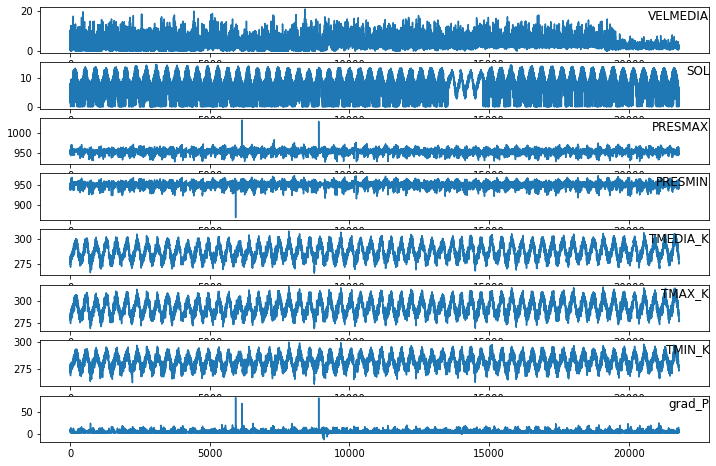

In [58]:
values=df.values

col2plot=[7,8,9,11,22,23,24,25]
i = 1
# plot each column
matplotlib.pyplot.figure()
for group in col2plot:
 matplotlib.pyplot.subplot(len(col2plot), 1, i)
 matplotlib.pyplot.plot(values[:, group])
 matplotlib.pyplot.title(df.columns[group], y=0.6, loc='right')
 i += 1
matplotlib.pyplot.show()

A la vista de estos valores vemos como los valores de temperaturas no presentan anomalías, no obstante los valores de presión presentan algún valor "outlier" y en el caso de sol los datos introducidos no han sido todo lo bueno que se desearía. Se van a filtrar estos valores que tienen una presión mayor a 1000 y menor a 900 suponiendo un mal funcionamiento del sensor. Además cuando el gradiente de presión sea negativo se dará el mismo valor a la presión máxima que a la mínima dado que este fenómeno es prueba de un error seguramente al calcular los valores NAN.

In [59]:

for col in ['PRESMAX','PRESMIN']:
  for index,valores in df[col].items():
    if df['grad_P'][index]>0:
      if valores>1000:
        df.loc[index,col]=975
      if valores<900:
        df.loc[index,col]=910
    else:
      df.loc[index,'PRESMAX']=df['PRESMIN'][index]

df['grad_P']=df['PRESMAX']-df['PRESMIN']
      


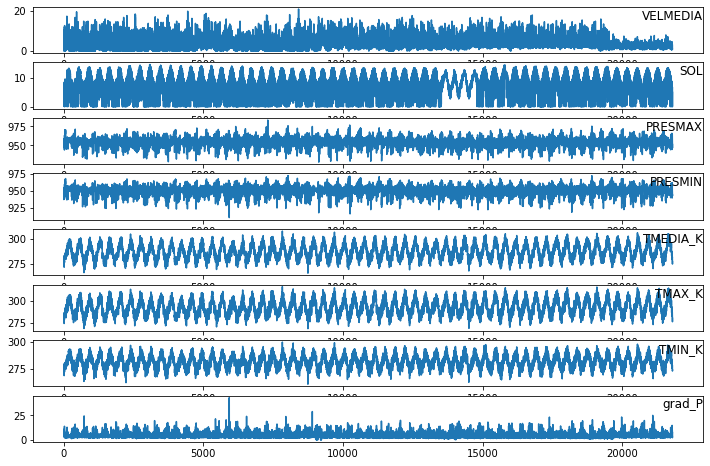

In [60]:
values=df.values

col2plot=[7,8,9,11,22,23,24,25]
i = 1
# plot each column
matplotlib.pyplot.figure()
for group in col2plot:
 matplotlib.pyplot.subplot(len(col2plot), 1, i)
 matplotlib.pyplot.plot(values[:, group])
 matplotlib.pyplot.title(df.columns[group], y=0.6, loc='right')
 i += 1
matplotlib.pyplot.show()

<AxesSubplot:>

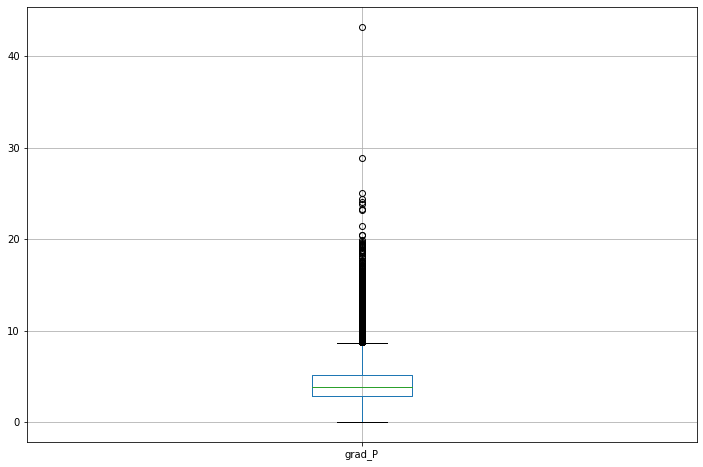

In [61]:
df.boxplot(column=['grad_P'])

<AxesSubplot:>

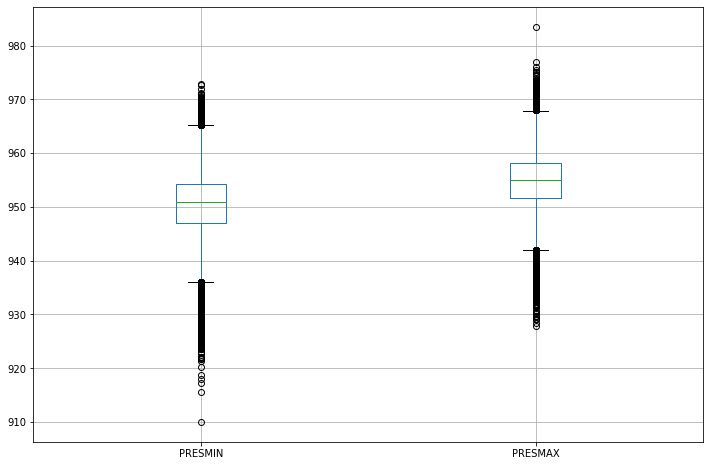

In [62]:
df.boxplot(column=['PRESMIN','PRESMAX'])

A la vista de estos tres gráficos no nos atrevferiamos a decir que el valor de grad_P de 40 sea un outlier. Bien podría haberse debido a un fenómeno meteorológico concreto en la zona que causará un valor de presión muy bajo o muy alto en un momento puntual, por ejemplo un "tornado". Que si bien son muy poco frecuentes y de intensidad muy moderada (nada comparable a los estadounidenses) se han dado de forma muy puntual en la peninsula y en la región concreta.


Se ha graficado la distribución de los valores nulos parqa poder saber si anomalías en las gráficas se debían a los datos originales o a los datos generados. Nos ha permitido mejorar las funciones empleadas para la adición de estos datos en un proceso iterativo que no se recoge en este documento.
 


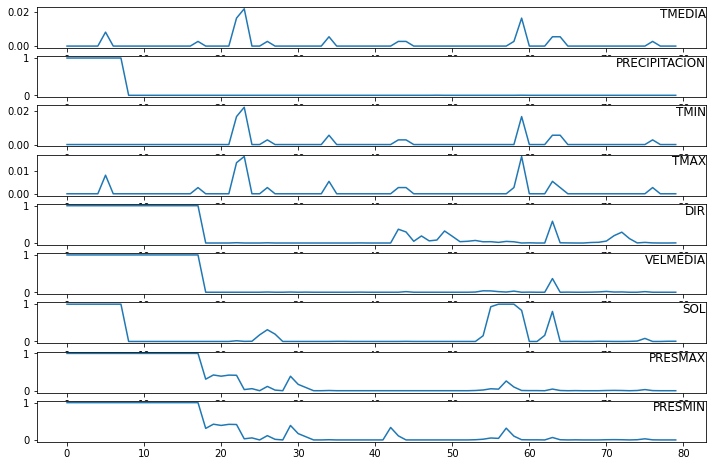

In [63]:
values=dfmv.values

col2plot=[5,6,7,9,11,12,15,16,18]
i = 1
# plot each column
matplotlib.pyplot.figure()
for group in col2plot:
 matplotlib.pyplot.subplot(len(col2plot), 1, i)
 matplotlib.pyplot.plot(values[:, group])
 matplotlib.pyplot.title(dfmv.columns[group], y=0.6, loc='right')
 i += 1
matplotlib.pyplot.show()

## Normalización de los datos 

In [64]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


In [86]:
scaler=MinMaxScaler(feature_range=(0,1))


dfNorm=df.copy(deep=True)
dfNorm=dfNorm.drop(['Unnamed: 0','HORATMIN','HORATMAX',  'HORAPRESMAX', 'HORAPRESMIN','TMIN','TMAX','TMEDIA'],axis=1)

dfNorm.columns

Index(['PRECIPITACION', 'VELMEDIA', 'SOL', 'PRESMAX', 'PRESMIN', 'FECHA_dt',
       'YEAR', 'MONTH', 'DAY', 'WEEK', 'HORAPRESMIN_2', 'HORAPRESMAX_2',
       'HORATMIN_2', 'HORATMAX_2', 'TMEDIA_K', 'TMAX_K', 'TMIN_K', 'grad_P'],
      dtype='object')

Esta función se ha cogido de un artículo cuyo enlace encabeza la celda. Nos permite dada una serie temporal obtener los valores t-1 en el horizonte deseado con la salida a predecir en la forma t+1

In [87]:
dfNorm.head()

,PRECIPITACION,VELMEDIA,SOL,PRESMAX,PRESMIN,FECHA_dt,YEAR,MONTH,DAY,WEEK,HORAPRESMIN_2,HORAPRESMAX_2,HORATMIN_2,HORATMAX_2,TMEDIA_K,TMAX_K,TMIN_K,grad_P
FECHA,,,,,,,,,,,,,,,,,,
1961-01-01,0.0,3.9,4.9,954.0,946.6,1961-01-01,1961,1,1,52,1961-01-01 23:00:00,1961-01-01 23:00:00,1961-01-01 05:50:00,1961-01-01 13:25:00,279.55,282.55,276.55,7.4
1961-01-02,5.6,3.1,4.2,955.6,947.2,1961-01-02,1961,1,2,1,1961-01-02 11:00:00,1961-01-02 11:00:00,1961-01-02 00:20:00,1961-01-02 14:00:00,278.65,282.55,274.75,8.4
1961-01-03,4.0,7.8,2.4,947.1,937.0,1961-01-03,1961,1,3,1,1961-01-03 00:00:00,1961-01-03 00:00:00,1961-01-03 05:00:00,1961-01-03 15:55:00,280.05,282.55,277.55,10.1
1961-01-04,0.0,10.6,3.7,948.4,939.9,1961-01-04,1961,1,4,1,1961-01-04 22:00:00,1961-01-04 22:00:00,1961-01-04 03:40:00,1961-01-04 13:10:00,277.35,279.95,274.75,8.5
1961-01-05,0.0,4.7,8.2,957.9,948.3,1961-01-05,1961,1,5,1,1961-01-05 23:00:00,1961-01-05 23:00:00,1961-01-05 05:10:00,1961-01-05 15:50:00,277.25,281.15,273.35,9.6


In [70]:
dfscaled=pd.DataFrame(scaled,columns=['PRECIPITACION', 'VELMEDIA', 'SOL', 'PRESMAX', 'PRESMIN', 'TMEDIA_K','TMAX_K', 'TMIN_K', 'grad_P'])



In [88]:
dfNorm[['PRECIPITACION', 'VELMEDIA', 'SOL', 'PRESMAX', 'PRESMIN', 'TMEDIA_K','TMAX_K', 'TMIN_K', 'grad_P']]=scaler.fit_transform(dfNorm[['PRECIPITACION', 'VELMEDIA', 'SOL', 'PRESMAX', 'PRESMIN', 'TMEDIA_K','TMAX_K', 'TMIN_K', 'grad_P']])


In [89]:
dfNorm.head()

,PRECIPITACION,VELMEDIA,SOL,PRESMAX,PRESMIN,FECHA_dt,YEAR,MONTH,DAY,WEEK,HORAPRESMIN_2,HORAPRESMAX_2,HORATMIN_2,HORATMAX_2,TMEDIA_K,TMAX_K,TMIN_K,grad_P
FECHA,,,,,,,,,,,,,,,,,,
1961-01-01,0.000000,0.184834,0.331081,0.469424,0.582803,1961-01-01,1961,1,1,52,1961-01-01 23:00:00,1961-01-01 23:00:00,1961-01-01 05:50:00,1961-01-01 13:25:00,0.334118,0.299578,0.406091,0.171296
1961-01-02,0.056169,0.146919,0.283784,0.498201,0.592357,1961-01-02,1961,1,2,1,1961-01-02 11:00:00,1961-01-02 11:00:00,1961-01-02 00:20:00,1961-01-02 14:00:00,0.312941,0.299578,0.360406,0.194444
1961-01-03,0.040120,0.369668,0.162162,0.345324,0.429936,1961-01-03,1961,1,3,1,1961-01-03 00:00:00,1961-01-03 00:00:00,1961-01-03 05:00:00,1961-01-03 15:55:00,0.345882,0.299578,0.431472,0.233796
1961-01-04,0.000000,0.502370,0.250000,0.368705,0.476115,1961-01-04,1961,1,4,1,1961-01-04 22:00:00,1961-01-04 22:00:00,1961-01-04 03:40:00,1961-01-04 13:10:00,0.282353,0.244726,0.360406,0.196759
1961-01-05,0.000000,0.222749,0.554054,0.539568,0.609873,1961-01-05,1961,1,5,1,1961-01-05 23:00:00,1961-01-05 23:00:00,1961-01-05 05:10:00,1961-01-05 15:50:00,0.280000,0.270042,0.324873,0.222222


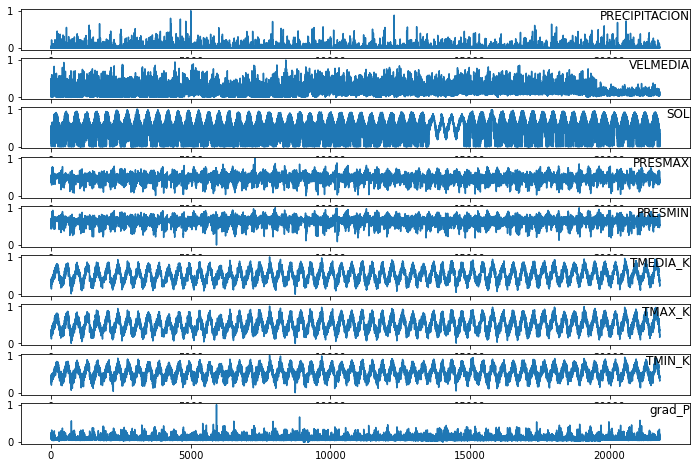

In [91]:
dfNorm[['PRECIPITACION', 'VELMEDIA', 'SOL', 'PRESMAX', 'PRESMIN', 'TMEDIA_K','TMAX_K', 'TMIN_K', 'grad_P']].values
col2plot=[0,1,2,3,4,5,6,7,8]
i = 1
# plot each column
matplotlib.pyplot.figure()
for group in col2plot:
 matplotlib.pyplot.subplot(len(col2plot), 1, i)
 matplotlib.pyplot.plot(dfscaled.values[:, group])
 matplotlib.pyplot.title(dfscaled.columns[group], y=0.6, loc='right')
 i += 1
matplotlib.pyplot.show()

Podemos ver cómo se han normalizado los datos entre 0 y 1. 

Algunos algortimos a emplear reequeiren de eliminar la estacionalidad, aunque no todos. Esto se podría hacer restando a el valor t el valor t-1, y a este t-2 guardando en un data frame estas diferencias. En ocasiones vamos a tener que usar una entrada al algoritmo de la forma [t, t-1,t-2,t-3...] con las salidas esperadas de la fomra [y+1,y+2,y+3...] para esto, una posibilidad sería usar una función como la aqui definida.


In [66]:
#https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/


from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True,):
  """
  Frame a time series as a supervised learning dataset.
  Arguments:
  data: Sequence of observations as a list or NumPy array.
  n_in: Number of lag observations as input (X).
  n_out: Number of observations as output (y).
  dropnan: Boolean whether or not to drop rows with NaN values.
  Returns:
  Pandas DataFrame of series framed for supervised learning.
  """
  n_vars = 1 if type(data) is list else data.shape[1]
  df = DataFrame(data)
  cols, names = list(), list()
  # input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  # forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
    
    cols.append(df.shift(-i))
    if i == 0:
      names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
      names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  # put it all together
  agg = concat(cols, axis=1)
  agg.columns = names
  # drop rows with NaN values
  if dropnan:
    agg.dropna(inplace=True)
  return agg

In [72]:

reframed = series_to_supervised(scaled, 60, 20)
print(reframed.head())

    var1(t-60)  var2(t-60)  var3(t-60)  var4(t-60)  var5(t-60)  var6(t-60)  \
60    0.000000    0.184834    0.331081    0.469425    0.582802    0.334117   
61    0.056169    0.146919    0.283784    0.498201    0.592357    0.312941   
62    0.040120    0.369668    0.162162    0.345324    0.429936    0.345882   
63    0.000000    0.502370    0.250000    0.368706    0.476114    0.282353   
64    0.000000    0.222749    0.554054    0.539570    0.609872    0.280000   

    var7(t-60)  var8(t-60)  var9(t-60)  var1(t-59)  ...  var9(t+18)  \
60    0.299578    0.406091    0.171296    0.056169  ...    0.057870   
61    0.299578    0.360406    0.194444    0.040120  ...    0.094907   
62    0.299578    0.431472    0.233796    0.000000  ...    0.162037   
63    0.244726    0.360406    0.196759    0.000000  ...    0.101852   
64    0.270042    0.324873    0.222222    0.000000  ...    0.071759   

    var1(t+19)  var2(t+19)  var3(t+19)  var4(t+19)  var5(t+19)  var6(t+19)  \
60         0.0    0.170616

Con esto tendríamos los datos preparados para el entrenamiento. Quedaría eso si eliminar las variables que no queramos estimar, o no pasarlas como inputs. Pero esto lo dejo para la implementación final ya que habría que decidir los horizontes temporales mñas optimos para el objetivo de la estimación. Consideraremos esta última parte como una amplaición y no como parte de la limpieza de lso datos. 

In [93]:
dfNorm.columns.values

array(['PRECIPITACION', 'VELMEDIA', 'SOL', 'PRESMAX', 'PRESMIN',
       'FECHA_dt', 'YEAR', 'MONTH', 'DAY', 'WEEK', 'HORAPRESMIN_2',
       'HORAPRESMAX_2', 'HORATMIN_2', 'HORATMAX_2', 'TMEDIA_K', 'TMAX_K',
       'TMIN_K', 'grad_P'], dtype=object)

## Datos de salida del proceso de limpieza 

Vamos a ver como quedaría el data set tras la limpieza y normalización que se ha realizado. Para ello vamos a volver a juntar las variables que acabammos de escalar con las variables temporales que teníamos en formato ISO, eliminado las variables temporales representas por un int. Vamos a partir del df sin normalizar y tras eliminar las columnas duplicadas (las que tienen la información transformada), vamos a cambiar los datos de las columnas cuyas variables hemos normalizado por estos valores normalizados.


In [94]:
dfNorm=dfNorm[['FECHA_dt','YEAR',	'MONTH',	'DAY',	'WEEK','TMIN_K','HORATMIN_2','TMAX_K','HORATMAX_2','TMEDIA_K','PRECIPITACION', 'VELMEDIA', 'SOL', 'PRESMAX','HORAPRESMAX_2', 'PRESMIN','HORAPRESMIN_2'	]]

In [95]:
dfNorm.head(10)

,FECHA_dt,YEAR,MONTH,DAY,WEEK,TMIN_K,HORATMIN_2,TMAX_K,HORATMAX_2,TMEDIA_K,PRECIPITACION,VELMEDIA,SOL,PRESMAX,HORAPRESMAX_2,PRESMIN,HORAPRESMIN_2
FECHA,,,,,,,,,,,,,,,,,
1961-01-01,1961-01-01,1961,1,1,52,0.406091,1961-01-01 05:50:00,0.299578,1961-01-01 13:25:00,0.334118,0.000000,0.184834,0.331081,0.469424,1961-01-01 23:00:00,0.582803,1961-01-01 23:00:00
1961-01-02,1961-01-02,1961,1,2,1,0.360406,1961-01-02 00:20:00,0.299578,1961-01-02 14:00:00,0.312941,0.056169,0.146919,0.283784,0.498201,1961-01-02 11:00:00,0.592357,1961-01-02 11:00:00
1961-01-03,1961-01-03,1961,1,3,1,0.431472,1961-01-03 05:00:00,0.299578,1961-01-03 15:55:00,0.345882,0.040120,0.369668,0.162162,0.345324,1961-01-03 00:00:00,0.429936,1961-01-03 00:00:00
1961-01-04,1961-01-04,1961,1,4,1,0.360406,1961-01-04 03:40:00,0.244726,1961-01-04 13:10:00,0.282353,0.000000,0.502370,0.250000,0.368705,1961-01-04 22:00:00,0.476115,1961-01-04 22:00:00
1961-01-05,1961-01-05,1961,1,5,1,0.324873,1961-01-05 05:10:00,0.270042,1961-01-05 15:50:00,0.280000,0.000000,0.222749,0.554054,0.539568,1961-01-05 23:00:00,0.609873,1961-01-05 23:00:00
1961-01-06,1961-01-06,1961,1,6,1,0.263959,1961-01-06 07:20:00,0.202532,1961-01-06 15:30:00,0.214118,0.000000,0.080569,0.148649,0.541367,1961-01-06 03:00:00,0.662420,1961-01-06 03:00:00
1961-01-07,1961-01-07,1961,1,7,1,0.380711,1961-01-07 05:55:00,0.316456,1961-01-07 12:30:00,0.331765,0.000000,0.303318,0.398649,0.516187,1961-01-07 11:00:00,0.679936,1961-01-07 11:00:00
1961-01-08,1961-01-08,1961,1,8,1,0.482234,1961-01-08 08:20:00,0.375527,1961-01-08 14:05:00,0.411765,0.000000,0.327014,0.351351,0.539568,1961-01-08 11:00:00,0.716561,1961-01-08 11:00:00
1961-01-09,1961-01-09,1961,1,9,2,0.370558,1961-01-09 08:45:00,0.295359,1961-01-09 14:05:00,0.315294,0.000000,0.184834,0.317568,0.552158,1961-01-09 08:00:00,0.687898,1961-01-09 08:00:00


In [96]:
dfNorm.to_csv('solucion_KDD')

In [104]:
dfNorm.shape[0]-df_original.shape[0]

-6821

In [99]:
df_original.shape

(28616, 20)

## RESUMEN
El trabajo de transformación de los datos ha consitido en:  
Se han eliminado un total de 6821 datos de los 28616 que teníamos.  
Se han transformado las horas y fechas a un formato comun.  
Se han calculado los valores NaN mediante distintos métodos.  
Se han eliminado los campos que no aportaban información como han sido: INDICATIVO, NOMBRE, PROVINCIA, ALTURA, RACHA, DIR  
Se han manipulado los datos outliers producto de los remplazos de algunos valores NAN en los que la diferencia de presión diaria era demasiada.   
 